# News Sentiment Prediction


# Importing Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
df=pd.read_csv('News Sentiment.csv')

In [3]:
df.shape

(55932, 11)

In [4]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


df.describe(include='all').T

In [6]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,IDLink,0
1,Title,0
2,Headline,0
3,Source,175
4,Topic,0
5,PublishDate,0
6,Facebook,0
7,GooglePlus,0
8,LinkedIn,0
9,SentimentTitle,0


There is a missing value in source column. 

In [7]:
df['Topic'].value_counts()

economy      20486
obama        16917
microsoft    12911
palestine     5618
Name: Topic, dtype: int64

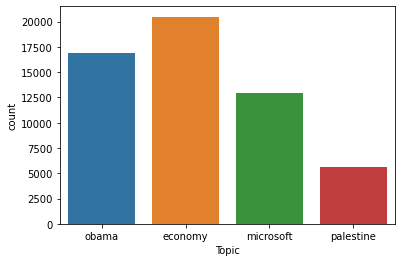

In [8]:
sns.countplot(df['Topic'])
plt.show()

In [9]:
#displaying comments on our data
df['Headline'][0]

'Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor'

In [10]:
df['Title'][0]

'Obama Lays Wreath at Arlington National Cemetery'

# Visualization

In [16]:
import nltk
from nltk.corpus import stopwords
#nltk.download()


In [17]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['Palestinian','Palestine','Microsoft','Economy','Obama','Barack'])

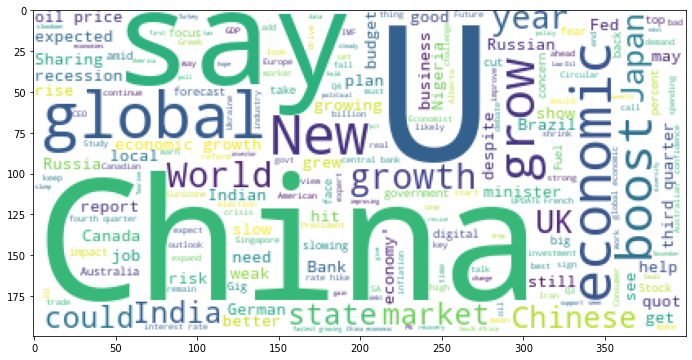

In [13]:
from wordcloud import WordCloud
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='economy'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.show()

We can see that that most common used word is economic, china,global

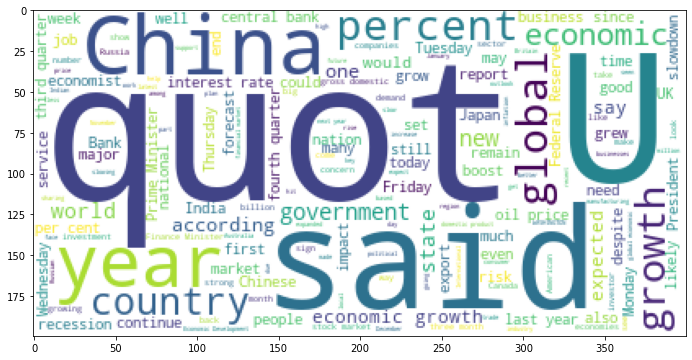

In [14]:
plt.figure(figsize=(12,6))
text = ' '.join(df['Headline'][df['Topic']=='economy'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

The most used word in headline for topic economy is quot, said, growth, country government.

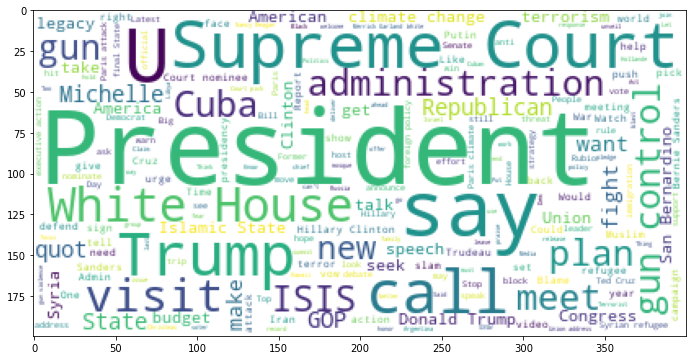

In [15]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='obama'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

The most common used word in headline for topic obama is  president,Supreme Court,administration

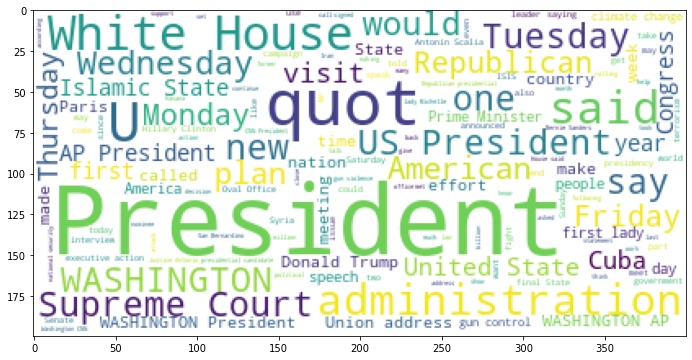

In [16]:
plt.figure(figsize=(12,6))
text = ' '.join(df['Headline'][df['Topic']=='obama'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

In headline, for Obama topic the most common used word is President, white house, congress.

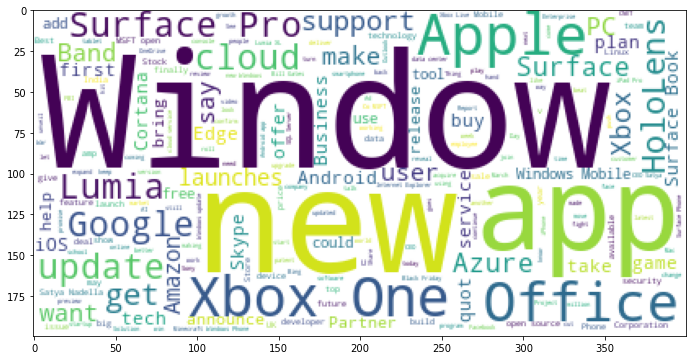

In [17]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='microsoft'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

For title in microsoft topic, the most common word used is Window, new, app, xbox, apple.

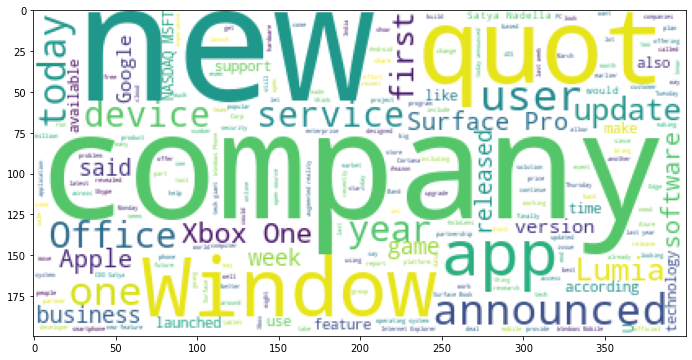

In [18]:
plt.figure(figsize=(12,6))
text = ' '.join(df['Headline'][df['Topic']=='microsoft'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

In headline, for microsoft topic the most common used word is company, window, new, quot,today

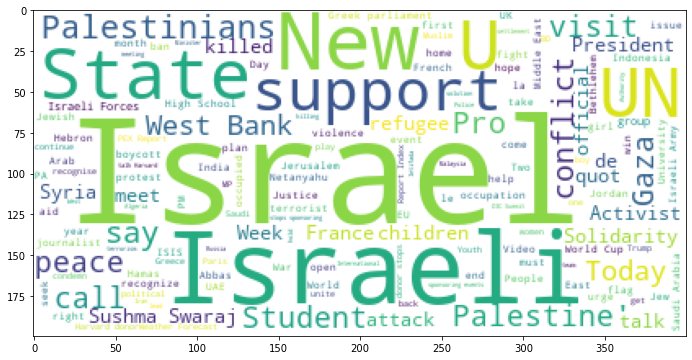

In [19]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='palestine'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

In title,for palestine topic the most common used word is Israeli, Israel, New palstinians, UN

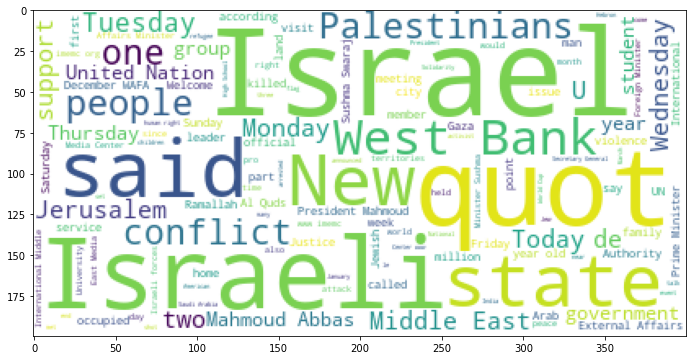

In [20]:
plt.figure(figsize=(12,6))
text = ' '.join(df['Headline'][df['Topic']=='palestine'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

In headline for palestine topic, the most common used word is Israel, Israeli, Tuesday,quot.

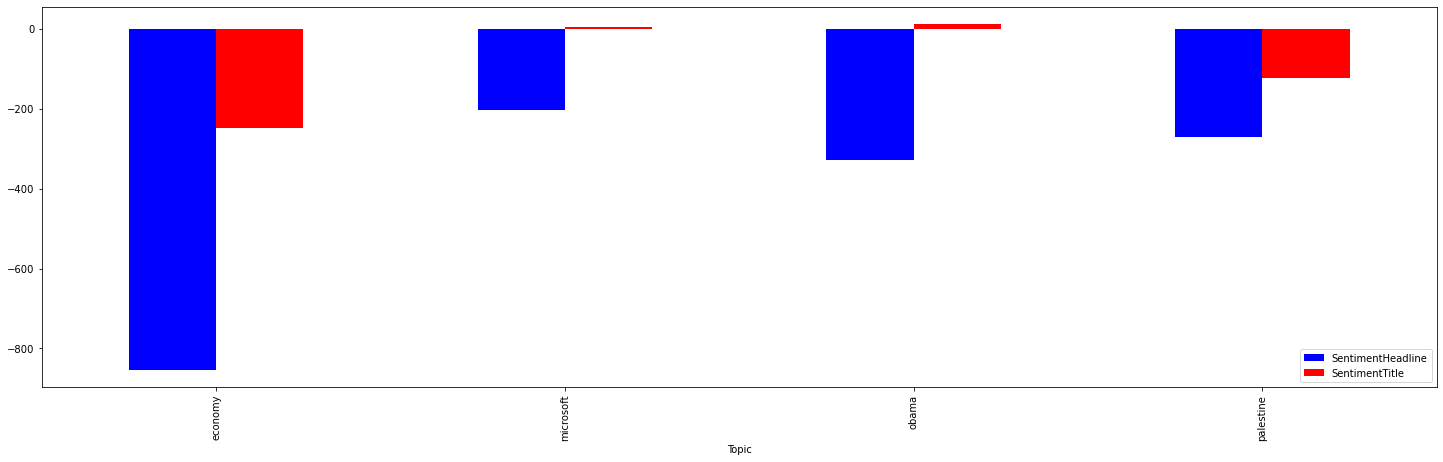

In [21]:
df.groupby('Topic')[['SentimentHeadline', 'SentimentTitle']].agg('sum').plot(kind='bar', figsize=(25, 7),
                                                          stacked=False, color=['b', 'r', 'g']);

We can see that in economy headline matters, it has high negative value

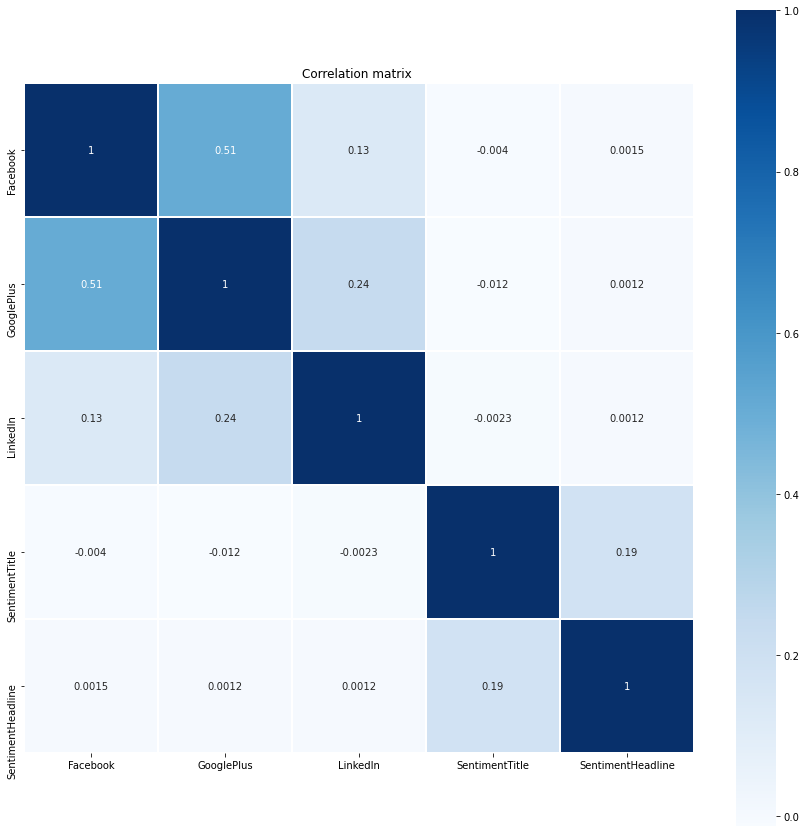

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='Blues',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
plt.show()

There is a negative correlation between sentiment title with Facebook, GooglePlus, Linkedin. 

# Data Pre-Processing

Let us clean our headline column. 

Firstly, let us remove punctuations

In [5]:
df_new=df[['Headline','Title']]
df_new

,Headline,Title
0,Obama Lays Wreath at Arlington National Cemete...,Obama Lays Wreath at Arlington National Cemetery
1,"Tim Haywood, investment director business-unit...",A Look at the Health of the Chinese Economy
2,"Nouriel Roubini, NYU professor and chairman at...",Nouriel Roubini: Global Economy Not Back to 2008
3,Finland's economy expanded marginally in the t...,Finland GDP Expands In Q4
4,Tourism and public spending continued to boost...,"Tourism, govt spending buoys Thai economy in J..."
...,...,...
55927,Retired Cuban leader Fidel Castro slammed Pres...,Fidel Castro Lashes Out at Obama After Cuba Visit
55928,President Obama caught some predictable flak f...,JOHN CRISP | Obama's strategic reaction to Bru...
55929,While Trump wants to put large tariffs on impo...,Think Trump's 45 Percent Tariffs Are Bad? Try ...
55930,Microsoft’s business customers are finally beg...,Microsoft finally releases giant Surface


In [6]:
#importing libaries
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
#Let us define function to remove punctuation
def remove_punct(text):
    text="".join([char.lower() for char in text if char not in string.punctuation])
    return text
df_new['H_clean']=df_new['Headline'].apply(lambda x: remove_punct(x))
#df_new['T_clean']=df_new['Title'].apply(lambda x: remove_punct(x))

In [8]:
pd.set_option('display.max_colwidth', 100) #to make column size wide

In [10]:
df_new['H_clean']

0        obama lays wreath at arlington national cemetery president barack obama has laid a wreath at the...
1        tim haywood investment director businessunit head for fixed income at gam discusses the china be...
2        nouriel roubini nyu professor and chairman at roubini global economics explains why the global e...
3        finlands economy expanded marginally in the three months ended december after contracting in the...
4        tourism and public spending continued to boost the economy in january in light of contraction in...
                                                        ...                                                 
55927    retired cuban leader fidel castro slammed president barack obamas recent visit to the caribbean ...
55928    president obama caught some predictable flak from the political right for the way he reacted  or...
55929    while trump wants to put large tariffs on imports from some of our major trading partners presid...
55930    microsoft’

Remove the HTML tags from the reviews.

In [12]:
from bs4 import BeautifulSoup
df_new['H_clean']=df_new['H_clean'].apply(lambda x: BeautifulSoup(x).get_text())
#df_new['T_pre_process']=df_new['T_clean'].apply(lambda x: BeautifulSoup(x).get_text())



In [11]:
import re
df_new['H_clean']=df_new['H_clean'].apply(lambda x: re.sub(r"http\S+", "", x))
#df_new['T_withoutURL']=df_new['T_pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))

In [12]:
df_new['H_clean']

0        obama lays wreath at arlington national cemetery president barack obama has laid a wreath at the...
1        tim haywood investment director businessunit head for fixed income at gam discusses the china be...
2        nouriel roubini nyu professor and chairman at roubini global economics explains why the global e...
3        finlands economy expanded marginally in the three months ended december after contracting in the...
4        tourism and public spending continued to boost the economy in january in light of contraction in...
                                                        ...                                                 
55927    retired cuban leader fidel castro slammed president barack obamas recent visit to the caribbean ...
55928    president obama caught some predictable flak from the political right for the way he reacted  or...
55929    while trump wants to put large tariffs on imports from some of our major trading partners presid...
55930    microsoft’

Perform the Contractions on the reviews.
for example- "it won’t be" converted as "it will not be" and remove numbers in the text

In [13]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", "not", s)
 s= re.sub(r"\'re", "are", s)
 s = re.sub(r"\'s", "is", s)
 s = re.sub(r"\"ll", "will", s)
 s = re.sub(r"\'t", "not", s)
 s = re.sub(r"\'ve", "have", s)
 s = re.sub(r"\'m", "am", s)
 s = re.sub("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"," ",s)
 s = re.sub("[^A-Za-z ]"," ",s)   
 return s
df_new['H_clean']=df_new['H_clean'].apply(lambda x:contractions(x))
#df_new['T_contractions']=df_new['T_withoutURL'].apply(lambda x:contractions(x))


In [14]:
df_new['H_clean'].head(8)

0    obama lays wreath at arlington national cemetery president barack obama has laid a wreath at the...
1    tim haywood investment director businessunit head for fixed income at gam discusses the china be...
2    nouriel roubini nyu professor and chairman at roubini global economics explains why the global e...
3    finlands economy expanded marginally in the three months ended december after contracting in the...
4    tourism and public spending continued to boost the economy in january in light of contraction in...
5    over     attendees expected to see latest version of microsoft dynamics sl and dynamics gp prweb...
6    ramallah february         wafa  palestine liberation organization s sectretarygeneral saeb ereka...
7    first lady michelle obama speaks in the state dinning room at the white house in washington wedn...
Name: H_clean, dtype: object

In [18]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
lema = WordNetLemmatizer()
token_headlines=[]
for i in df_new['H_clean']:
    headlines = word_tokenize(i)
    headlines = [lema.lemmatize(word) for word in headlines if word not in stopwords]
    token_headlines.append(" ".join(headlines))
    


In [19]:
token_headlines

['obama lay wreath arlington national cemetery president barack obama laid wreath tomb unknown honor',
 'tim haywood investment director businessunit head fixed income gam discus china beige book state economy',
 'nouriel roubini nyu professor chairman roubini global economics explains global economy isnt facing condition',
 'finland economy expanded marginally three month ended december contracting previous quarter preliminary figure statistic finland showed monday',
 'tourism public spending continued boost economy january light contraction private consumption export according bank thailand data',
 'attendee expected see latest version microsoft dynamic sl dynamic gp prweb february read full story',
 'ramallah february wafa palestine liberation organization sectretarygeneral saeb erekat thursday expressed concern kenyan president uhuru kenyatta visit jerusalem jordan valley',
 'first lady michelle obama speaks state dinning room white house washington wednesday feb interactive studen

In [27]:
# remove_l=['aa', 'aaa', 'aapl','abc']
# token_headlines=[i for i in token_headlines if i not in remove_l]

In [20]:
#Importing term frequency-Inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(max_features=4000)

In [21]:
#let us round our target variable
df['SentimentHeadline']=round(df['SentimentHeadline'])
df['SentimentHeadline']

0       -0.0
1       -0.0
2        0.0
3        0.0
4        0.0
        ... 
55927   -0.0
55928    0.0
55929    0.0
55930   -0.0
55931    0.0
Name: SentimentHeadline, Length: 55932, dtype: float64

In [22]:
df['SentimentHeadline'].value_counts(normalize=True)*100

-0.0    99.730029
-1.0     0.177001
 1.0     0.092970
Name: SentimentHeadline, dtype: float64

We can see that score zero occurs 99% percent times.

In [24]:
x=token_headlines
y=df['SentimentHeadline']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
x_train_tf=tfidf_vect.fit_transform(x_train)
x_test_tf=tfidf_vect.transform(x_test)

In [27]:
x_train_tf

<39152x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 508880 stored elements in Compressed Sparse Row format>

In [23]:
x_train_tf=pd.DataFrame(x_train_tf.toarray(),columns=tfidf_vect.get_feature_names())
x_train_tf

,aa,aaa,aapl,aaron,abandon,abandoned,abarrel,abbas,abbott,abc,...,zika,zimbabwe,zimbabwean,zionist,zone,zoning,zuma,zumas,zune,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
x_train_tf.columns

Index(['aa', 'aaa', 'aapl', 'aaron', 'abandon', 'abandoned', 'abarrel',
       'abbas', 'abbott', 'abc',
       ...
       'zika', 'zimbabwe', 'zimbabwean', 'zionist', 'zone', 'zoning', 'zuma',
       'zumas', 'zune', 'zurich'],
      dtype='object', length=8000)

In [28]:
x_train_tf.drop(remove_l,axis=1,inplace=True)

MemoryError: Unable to allocate 2.33 GiB for an array with shape (39152, 7996) and data type float64

In [24]:
x_test_tf=pd.DataFrame(x_test_tf.toarray(),columns=tfidf_vect.get_feature_names())
x_test_tf

,aa,aaa,aapl,aaron,abandon,abandoned,abarrel,abbas,abbott,abc,...,zika,zimbabwe,zimbabwean,zionist,zone,zoning,zuma,zumas,zune,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let us reduce dimensions of our dataset using PCA. 

In [25]:
#import pca
from sklearn.decomposition import PCA

In [26]:
pca=PCA(n_components=10)

In [27]:
pca_components=pca.fit_transform(x_train_tf)

In [28]:
pca_components.shape  

(39152, 10)

In [29]:
pca_x_train = pd.DataFrame(data = pca_components)

In [30]:
pca_x_train

,0,1,2,3,4,5,6,7,8,9
0,0.166325,0.005408,-0.010765,-0.009447,0.015032,-0.019911,0.053690,-0.032276,0.030972,-0.003174
1,-0.033193,0.065486,0.021647,-0.035881,-0.159695,0.148650,-0.038267,-0.014276,0.056888,0.026264
2,-0.102192,0.090708,-0.049576,-0.031589,-0.015617,0.012006,0.027990,0.015092,-0.037065,0.106340
3,-0.099804,-0.223097,-0.060555,0.019649,-0.004279,0.021362,0.011996,-0.093965,0.012103,0.014446
4,-0.086653,0.100089,-0.024691,0.029499,-0.037893,-0.020456,-0.010941,-0.043613,0.046670,0.018537
...,...,...,...,...,...,...,...,...,...,...
39147,0.042363,0.015722,0.001832,-0.027747,-0.007138,0.017421,-0.046663,0.028493,-0.021575,-0.002973
39148,-0.025899,-0.011579,0.136926,0.042858,-0.004788,-0.026717,0.013228,0.016342,0.015382,-0.032022
39149,0.049269,0.003218,-0.052937,0.027092,-0.021900,-0.041019,0.057494,-0.001693,-0.067456,0.010624
39150,-0.055860,-0.074712,0.008015,-0.002418,0.001542,-0.009279,-0.034043,-0.060566,-0.033337,0.036335


In [31]:
pca_components_x_test=pca.fit_transform(x_test_tf)

In [32]:
pca_x_test = pd.DataFrame(data = pca_components_x_test)

In [33]:
pca_x_test

,0,1,2,3,4,5,6,7,8,9
0,-0.078830,0.141971,-0.034146,0.020488,-0.001507,0.014575,0.002073,-0.014187,0.009008,0.031283
1,0.111839,0.011802,-0.000628,0.003141,0.013150,-0.027255,0.006254,0.005838,0.002506,-0.003551
2,-0.053904,0.107278,-0.010402,-0.006742,-0.002063,-0.001886,-0.014936,-0.010747,0.022772,0.025994
3,-0.059951,-0.033652,-0.011442,0.008748,-0.041825,-0.008616,0.004303,0.012477,-0.043264,0.018442
4,0.226924,-0.019243,0.117213,0.127814,0.032203,-0.044591,0.097525,0.001456,0.001955,0.137035
...,...,...,...,...,...,...,...,...,...,...
16775,-0.013347,0.011462,0.016593,-0.040272,-0.010932,-0.019681,0.002557,0.005644,-0.005599,0.034383
16776,-0.055438,-0.070715,-0.022481,0.039756,-0.012524,-0.021476,-0.014940,-0.062064,-0.012670,-0.009753
16777,0.083177,0.008279,0.001693,-0.002730,0.025142,-0.033116,0.099785,0.007156,0.050400,0.018698
16778,-0.084690,0.167734,-0.054789,-0.027946,-0.008348,0.007938,0.012555,-0.031298,-0.034623,0.112380


# Modelling

# Naive Bayes Algorithm

In [36]:
from sklearn.naive_bayes import GaussianNB
Gaussian_nb=GaussianNB()

In [37]:
Gaussian_nb.fit(pca_x_train,y_train)

GaussianNB()

In [38]:
y_gaussian=Gaussian_nb.predict(pca_x_test)

In [39]:
#let us check our accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy is: ", accuracy_score(y_test,y_gaussian))
print("Precision is: ", precision_score(y_test,y_gaussian, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_gaussian, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_gaussian, average = 'micro'))

Accuracy is:  0.9938021454112038
Precision is:  0.9938021454112038
Recall is:  0.9938021454112038
F1 score is:  0.9938021454112038


In [73]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(pca_x_train,y_train)

BernoulliNB()

In [41]:
y_bernoulli=bernoulli_nb.predict(pca_x_test)

In [42]:
#Let us check our accuracy
print("Accuracy is :",accuracy_score(y_test,y_bernoulli))
print("Precision is: ", precision_score(y_test,y_gaussian, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_gaussian, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_gaussian, average = 'micro'))

Accuracy is : 0.9965435041716328
Precision is:  0.9938021454112038
Recall is:  0.9938021454112038
F1 score is:  0.9938021454112038


From both Guassian NB and Bernoulli NB we can see that both model gave us a very good accuracy, precision

# Random Forest Algorithm

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [44]:
rf.fit(pca_x_train,y_train)

RandomForestClassifier()

In [45]:
y_rf=rf.predict(pca_x_test)

In [46]:
#Let us check our accuracy
print("Accuracy is :",accuracy_score(y_test,y_rf))
print("Precision is: ", precision_score(y_test,y_rf, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_rf, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_rf, average = 'micro'))

Accuracy is : 0.9965435041716328
Precision is:  0.9965435041716328
Recall is:  0.9965435041716328
F1 score is:  0.9965435041716328


# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()

In [48]:
logit.fit(pca_x_train,y_train)

LogisticRegression()

In [49]:
y_logit=logit.predict(pca_x_test)

In [50]:
#Let us check our accuracy
print("Accuracy is :",accuracy_score(y_test,y_logit))
print("Precision is: ", precision_score(y_test,y_logit, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_logit, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_logit, average = 'micro'))

Accuracy is : 0.9965435041716328
Precision is:  0.9965435041716328
Recall is:  0.9965435041716328
F1 score is:  0.9965435041716328


# Let us perform hyper parameter tunning on Naive Bayes

Gaussian Naive Bayes

Actually GuassianNB does not accept any parameter: GaussianNB().get_params().keys() results in 'priors', 'var_smoothing'

Finally it seems that only way to make this model better is that to set the value for var_smoothing. 

In [51]:
GaussianNB().get_params().keys() 

dict_keys(['priors', 'var_smoothing'])

In [61]:
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=Gaussian_nb, 
                 param_grid=params_NB,
                 cv=5, # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(pca_x_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1.0}

In [63]:
best_estimator=gs_NB.best_estimator_
best_estimator

GaussianNB(var_smoothing=1.0)

In [65]:
y_best_estimator=best_estimator.predict(pca_x_test)

In [69]:
print("Accuracy is :",accuracy_score(y_test,y_best_estimator))
print("Precision is: ", precision_score(y_test,y_gaussian, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_gaussian, average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_gaussian, average = 'micro'))

Accuracy is : 0.9965435041716328
Precision is:  0.9938021454112038
Recall is:  0.9938021454112038
F1 score is:  0.9938021454112038


After we have hyper tunned our gaussian NB there is a slight increase in the accuracy

# let us perform hyper parameter tunning on  our random forest

In [75]:
RandomForestClassifier().get_params().keys() 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [81]:
param_grid = {'bootstrap': [True,False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': [2,4,5,6,8],
              'min_samples_leaf': [100,150,200,250,300,350,400],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800]
              'max_terminal_nodes':[2,4,6,8,10,12,14,16,18,20]
              'max_samples':[0,0.2,0.3,0.4,0.6,0.8,1.0,None]
              }

In [82]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, n_iter = 100,param_distributions = param_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [83]:
rf_random.fit(pca_x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

# Let us perform hyper parameter tuning on logisitic regression

In [84]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [86]:
param_grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : np.logspace(-4, 4, 20),
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [100, 1000,2500],
            'dual': [True,False],
            'fit_intercept':[True,False],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'verbose':[0,1,2,3,4]
    }

In [87]:
clf = GridSearchCV(logit, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [88]:
clf.fit(pca_x_train,y_train)

Fitting 3 folds for each of 192000 candidates, totalling 576000 fits


KeyboardInterrupt: 